# Boosting Algorithms

In [150]:
#pip install xgboost matplotlib graphviz

In [252]:
from imblearn.metrics import specificity_score
from lazypredict.Supervised import LazyRegressor
from sklearn.impute import KNNImputer
from sklearn.metrics import *
from sklearn.model_selection import train_test_split as tts
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.tree import plot_tree, export_text
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from statsmodels.stats.outliers_influence import variance_inflation_factor
from xgboost import XGBClassifier
from xgboost import XGBRegressor
import joblib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import xgboost as xgb


In [152]:
# Your code here
df = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/decision-tree-project-tutorial/main/diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.60,0.63,50,1
1,1,85,66,29,0,26.60,0.35,31,0
2,8,183,64,0,0,23.30,0.67,32,1
3,1,89,66,23,94,28.10,0.17,21,0
4,0,137,40,35,168,43.10,2.29,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.90,0.17,63,0
764,2,122,70,27,0,36.80,0.34,27,0
765,5,121,72,23,112,26.20,0.24,30,0
766,1,126,60,0,0,30.10,0.35,47,1


In [153]:
print(df.shape)
df.info()

(768, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [154]:
unique_var = df.nunique()==1

if any(unique_var): 
    for col in unique_var.index[unique_var] : print(f"The variable {i} content only one category.")
else: print(f"There's no variable with only one category.")

There's no variable with only one category.


In [155]:
aux = df.nunique().sort_values().head()
aux1 = df.nunique().sort_values().tail()
print(f''' 
      Unique values sorted head(5):
      
      {aux}
      
      Unique values sorted tail(5)
      
      {aux1}
      ''')


 
      Unique values sorted head(5):
      
      Outcome           2
Pregnancies      17
BloodPressure    47
SkinThickness    51
Age              52
dtype: int64
      
      Unique values sorted tail(5)
      
      Age                          52
Glucose                     136
Insulin                     186
BMI                         248
DiabetesPedigreeFunction    517
dtype: int64
      


In [156]:
print(f'Number of duplicated values: {df.duplicated().sum()}') 

Number of duplicated values: 0


In [157]:
print(f'Number of NaN values: {df.isna().sum().sum()}') 

Number of NaN values: 0


In [158]:
aux = list(df.columns[df.dtypes=='object'])
print(f'Columns dtypes == "object": {aux}')

Columns dtypes == "object": []


In [159]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.00,3.85,3.37,0.00,1.00,3.00,6.00,17.00
Glucose,768.00,120.89,31.97,0.00,99.00,117.00,140.25,199.00
BloodPressure,768.00,69.11,19.36,0.00,62.00,72.00,80.00,122.00
SkinThickness,768.00,20.54,15.95,0.00,0.00,23.00,32.00,99.00
Insulin,768.00,79.80,115.24,0.00,0.00,30.50,127.25,846.00
BMI,768.00,31.99,7.88,0.00,27.30,32.00,36.60,67.10
DiabetesPedigreeFunction,768.00,0.47,0.33,0.08,0.24,0.37,0.63,2.42
Age,768.00,33.24,11.76,21.00,24.00,29.00,41.00,81.00
Outcome,768.00,0.35,0.48,0.00,0.00,0.00,1.00,1.00


In [160]:
print(df.Outcome.sum()/df.Outcome.count()) #Solo de curioso

0.3489583333333333


In [161]:
df.head(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.60,0.63,50,1
1,1,85,66,29,0,26.60,0.35,31,0
2,8,183,64,0,0,23.30,0.67,32,1


Text(0, 0.5, 'count')

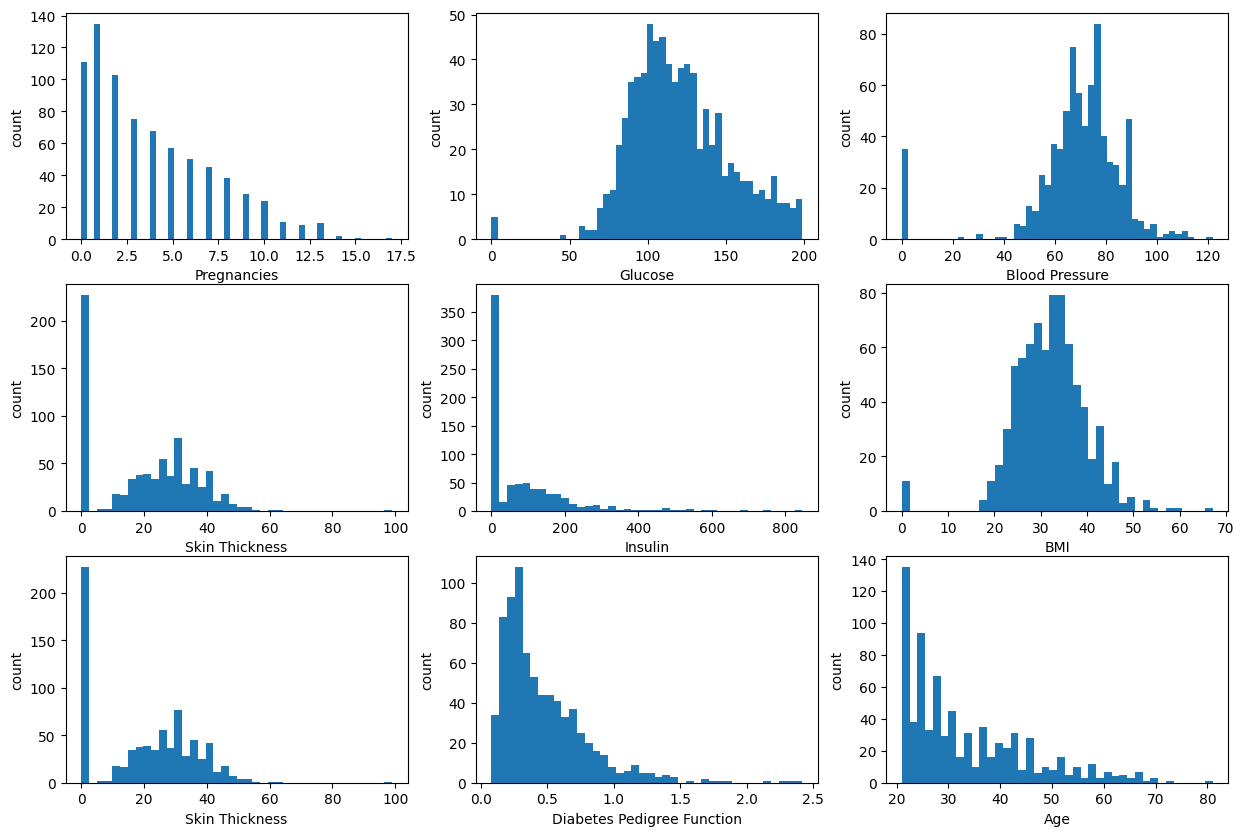

In [162]:
#para hacerme una idea de las distribuciones segun c/valor numerico
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6), (ax7, ax8, ax9)) = plt.subplots(3, 3, figsize=(15, 10))

ax1.hist(df['Pregnancies'], bins=50)
ax1.set_xlabel('Pregnancies')
ax1.set_ylabel('count')

ax2.hist(df['Glucose'], bins=50)
ax2.set_xlabel('Glucose')
ax2.set_ylabel('count')

ax3.hist(df['BloodPressure'], bins=50)
ax3.set_xlabel('Blood Pressure')
ax3.set_ylabel('count')

ax4.hist(df['SkinThickness'], bins=40)
ax4.set_xlabel('Skin Thickness')
ax4.set_ylabel('count')

ax5.hist(df['Insulin'], bins=40)
ax5.set_xlabel('Insulin')
ax5.set_ylabel('count')

ax6.hist(df['BMI'], bins=40)
ax6.set_xlabel('BMI')
ax6.set_ylabel('count')

ax7.hist(df['SkinThickness'], bins=40)
ax7.set_xlabel('Skin Thickness')
ax7.set_ylabel('count')

ax8.hist(df['DiabetesPedigreeFunction'], bins=40)
ax8.set_xlabel('Diabetes Pedigree Function')
ax8.set_ylabel('count')

ax9.hist(df['Age'], bins=40)
ax9.set_xlabel('Age')
ax9.set_ylabel('count')

In [163]:
df[df==0].count()/df.count()

Pregnancies                0.14
Glucose                    0.01
BloodPressure              0.05
SkinThickness              0.30
Insulin                    0.49
BMI                        0.01
DiabetesPedigreeFunction   0.00
Age                        0.00
Outcome                    0.65
dtype: float64

In [164]:
# Cambio los valores 0 de cada columna con el KNMImputer, con los valores de los 4 vecinos cercanos.

df_imputed = df.copy() 
columns_to_impute = df_imputed.drop(['Pregnancies', 'Outcome'], axis=1) # Excluyo las columnas 'Pregnancies' y 'Outcome' porque sí nos interesan esos valores 0
columns_to_impute.replace(0, np.nan, inplace=True) #paso los ceros a nan para el KNMImp
imputer = KNNImputer(n_neighbors=4)
imputed_values = imputer.fit_transform(columns_to_impute)
imputed_df = pd.DataFrame(imputed_values, columns=columns_to_impute.columns) # el KNM me lo cambia a array, lo vuelvo a df
df_imputed = pd.concat([df_imputed[['Pregnancies']].reset_index(drop=True),imputed_df, df_imputed[['Outcome']].reset_index(drop=True)], axis=1) # meto de nuevo 'Pregnancies' y 'Outcome' con los valores 0 que si nos interesan 

print(df_imputed)


     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6   148.00          72.00          35.00   125.75 33.60   
1              1    85.00          66.00          29.00    62.25 26.60   
2              8   183.00          64.00          25.75   176.25 23.30   
3              1    89.00          66.00          23.00    94.00 28.10   
4              0   137.00          40.00          35.00   168.00 43.10   
..           ...      ...            ...            ...      ...   ...   
763           10   101.00          76.00          48.00   180.00 32.90   
764            2   122.00          70.00          27.00   158.75 36.80   
765            5   121.00          72.00          23.00   112.00 26.20   
766            1   126.00          60.00          30.75   114.00 30.10   
767            1    93.00          70.00          31.00    70.75 30.40   

     DiabetesPedigreeFunction   Age  Outcome  
0                        0.63 50.00        1  
1                

Text(0, 0.5, 'count')

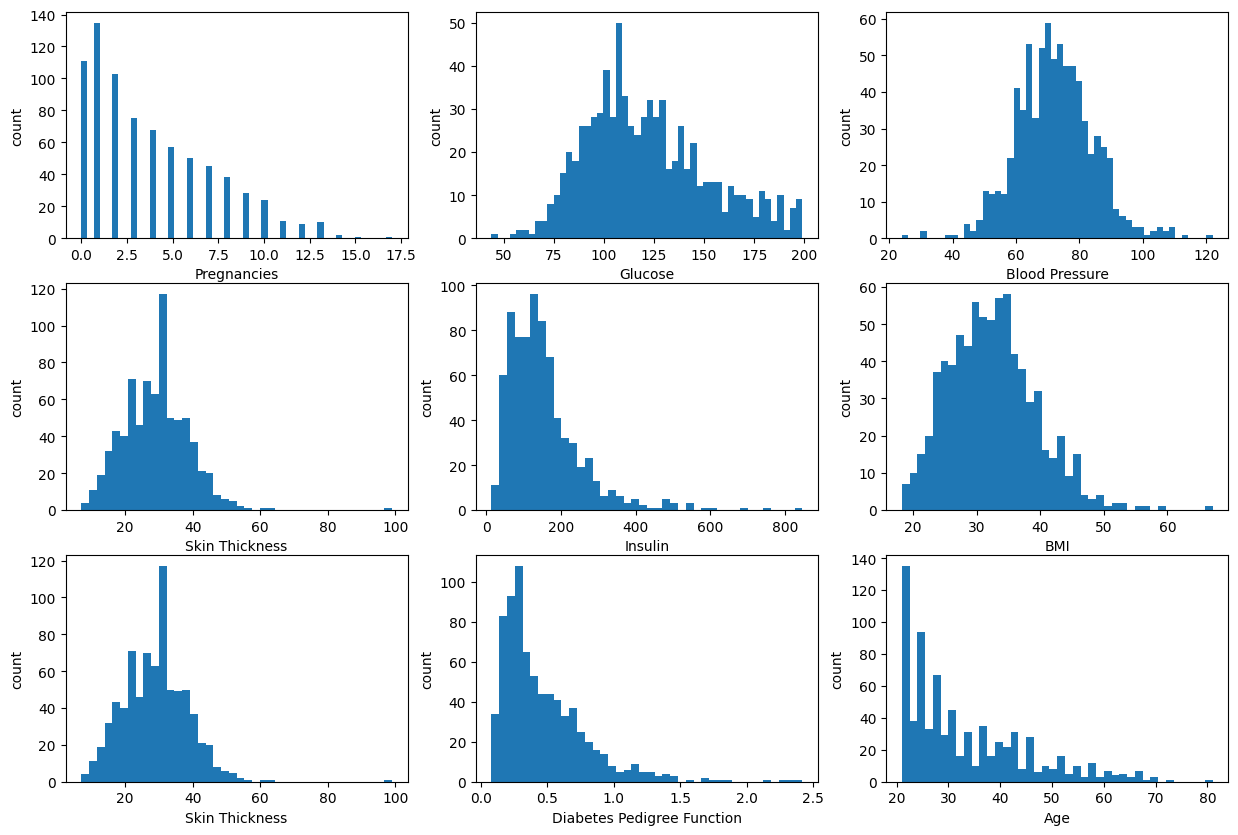

In [165]:
# Veo de nuevo como han quedado las distribuciones
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6), (ax7, ax8, ax9)) = plt.subplots(3, 3, figsize=(15, 10))

ax1.hist(df_imputed['Pregnancies'], bins=50)
ax1.set_xlabel('Pregnancies')
ax1.set_ylabel('count')

ax2.hist(df_imputed['Glucose'], bins=50)
ax2.set_xlabel('Glucose')
ax2.set_ylabel('count')

ax3.hist(df_imputed['BloodPressure'], bins=50)
ax3.set_xlabel('Blood Pressure')
ax3.set_ylabel('count')

ax4.hist(df_imputed['SkinThickness'], bins=40)
ax4.set_xlabel('Skin Thickness')
ax4.set_ylabel('count')

ax5.hist(df_imputed['Insulin'], bins=40)
ax5.set_xlabel('Insulin')
ax5.set_ylabel('count')

ax6.hist(df_imputed['BMI'], bins=40)
ax6.set_xlabel('BMI')
ax6.set_ylabel('count')

ax7.hist(df_imputed['SkinThickness'], bins=40)
ax7.set_xlabel('Skin Thickness')
ax7.set_ylabel('count')

ax8.hist(df_imputed['DiabetesPedigreeFunction'], bins=40)
ax8.set_xlabel('Diabetes Pedigree Function')
ax8.set_ylabel('count')

ax9.hist(df_imputed['Age'], bins=40)
ax9.set_xlabel('Age')
ax9.set_ylabel('count')

In [166]:
X = df_imputed.drop('Outcome', axis=1)
y = df_imputed['Outcome']

X_train, X_test, y_train, y_test = tts(X, y, test_size=0.2, random_state=420)


In [167]:
# Usamos xgb para conocer la importancia de las características
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=420).fit(X_train, y_train)
df_imp = pd.DataFrame({'Feature':X_train.columns, 'Importance':xgb_model.feature_importances_*100})
df_imp = df_imp.sort_values(by='Importance', ascending=False)
df_imp

,Feature,Importance
1,Glucose,22.60
5,BMI,21.71
7,Age,18.05
4,Insulin,9.66
6,DiabetesPedigreeFunction,9.15
3,SkinThickness,6.88
2,BloodPressure,6.50
0,Pregnancies,5.45


All variables are relevant and should be considered

In [168]:
'''
Obtenemos los valores de inflación de la varianza a partir de la matriz de correlaciones. 
Esto nos ayuda a identificar aquellas variables que presentan correlación con otras en nuestro dataset; 
esto es importante ya que debemos siempre que sea posible evitar la redundancia en los datos con el fin de 
mejorar la capacidad predictiva y de generalización de nuestros modelos. 
Un buen punto de corte para el vif suele ser 10. Un vif infinito implica una correlación perfecta.
'''
vif = pd.Series([variance_inflation_factor(X_train.corr().values, i) for i in range(X_train.corr().shape[1])], index=X_train.columns)
vif

Pregnancies                4.34
Glucose                    6.98
BloodPressure              2.57
SkinThickness              8.31
Insulin                    6.48
BMI                        9.81
DiabetesPedigreeFunction   1.23
Age                        5.87
dtype: float64

In [169]:
# matriz de correlaciones segun VIF
X_corr = X_train.copy()
X_corr['y'] = y_train
corr = X_corr.corr()
corr.style.background_gradient(cmap='coolwarm').format(precision=3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,y
Pregnancies,1.000,0.124,0.226,0.110,0.042,0.019,-0.033,0.571,0.201
Glucose,0.124,1.000,0.234,0.238,0.626,0.254,0.136,0.243,0.481
BloodPressure,0.226,0.234,1.000,0.217,0.116,0.292,0.004,0.318,0.177
SkinThickness,0.110,0.238,0.217,1.000,0.215,0.671,0.131,0.120,0.291
Insulin,0.042,0.626,0.116,0.215,1.000,0.244,0.133,0.212,0.312
BMI,0.019,0.254,0.292,0.671,0.244,1.000,0.165,0.025,0.340
DiabetesPedigreeFunction,-0.033,0.136,0.004,0.131,0.133,0.165,1.000,0.021,0.150
Age,0.571,0.243,0.318,0.120,0.212,0.025,0.021,1.000,0.226
y,0.201,0.481,0.177,0.291,0.312,0.340,0.150,0.226,1.000


### None of variables seems to be extremely correlated with another one in a significant way. We may proceed with all variables

In [280]:
model1 = XGBClassifier(max_depth=10, min_child_weight=20, learning_rate=0.01, random_state=420)
model1.fit(X_train, y_train)

model2 = XGBClassifier(max_depth=20, min_child_weight=10, learning_rate=0.02, random_state=420)
model2.fit(X_train, y_train)

model3 = XGBClassifier(max_depth=50, min_child_weight=5, learning_rate=0.025, random_state=420)
model3.fit(X_train, y_train)

model4 = XGBClassifier(max_depth=30, min_child_weight=10, learning_rate=0.02, random_state=420)
model4.fit(X_train, y_train)

model5 = XGBClassifier(max_depth=10, min_child_weight=20, learning_rate=0.01, random_state=420)
model5.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=20, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=420, ...)

In [281]:
df1 = pd.DataFrame(output_1)
df1 = df1[0].str.split(',', expand=True)
df1

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,0:[Glucose<128] yes=1,no=2,missing=2\n\t1:[Age<29] yes=3,no=4,missing=4\n\t\t3:[BMI<30.8999996] yes=7,no=8,missing=8\n\t\t\t7:leaf=-0.0353774391\n\t\t\t8...,no=14,missing=14\n\t\t\t\t13:leaf=-0.024312092\n\t\t...,no=10,missing=10\n\t\t\t9:leaf=-0.0217602719\n\t\t\t...,no=16,missing=16\n\t\t\t\t15:leaf=0.00180705253\n\t\...,no=6,missing=6\n\t\t5:leaf=-0.00791982468\n\t\t6:[D...,no=12,missing=12\n\t\t\t11:leaf=0.0233917963\n\t\t\t...,no=18,missing=18\n\t\t\t\t17:leaf=0.0383364782\n\t\t...
1,0:[Glucose<128] yes=1,no=2,missing=2\n\t1:[Age<29] yes=3,no=4,missing=4\n\t\t3:[BMI<30.8999996] yes=7,no=8,missing=8\n\t\t\t7:leaf=-0.0348902792\n\t\t\t8...,no=14,missing=14\n\t\t\t\t13:leaf=-0.0239192359\n\t\...,no=10,missing=10\n\t\t\t9:leaf=-0.0213814545\n\t\t\t...,no=16,missing=16\n\t\t\t\t15:leaf=0.00176493323\n\t\...,no=6,missing=6\n\t\t5:leaf=-0.00775224576\n\t\t6:[D...,no=12,missing=12\n\t\t\t11:leaf=0.0227044076\n\t\t\t...,no=18,missing=18\n\t\t\t\t17:leaf=0.0370519534\n\t\t...
2,0:[Glucose<128] yes=1,no=2,missing=2\n\t1:[Age<29] yes=3,no=4,missing=4\n\t\t3:[BMI<30.8999996] yes=7,no=8,missing=8\n\t\t\t7:leaf=-0.034423586\n\t\t\t8:...,no=14,missing=14\n\t\t\t\t13:leaf=-0.0235360656\n\t\...,no=10,missing=10\n\t\t\t9:leaf=-0.0210112706\n\t\t\t...,no=16,missing=16\n\t\t\t\t15:leaf=0.00172381662\n\t\...,no=6,missing=6\n\t\t5:leaf=-0.00758807082\n\t\t6:[D...,no=12,missing=12\n\t\t\t11:leaf=0.0220460054\n\t\t\t...,no=18,missing=18\n\t\t\t\t17:leaf=0.035843987\n\t\t\...
3,0:[Glucose<128] yes=1,no=2,missing=2\n\t1:[Age<29] yes=3,no=4,missing=4\n\t\t3:[SkinThickness<28.75] yes=7,no=8,missing=8\n\t\t\t7:leaf=-0.0329274908\n\t\t\t8...,no=10,missing=10\n\t\t\t9:leaf=-0.0206493102\n\t\t\t...,no=14,missing=14\n\t\t\t\t13:leaf=0.00217811414\n\t\...,no=6,missing=6\n\t\t5:leaf=-0.00742723653\n\t\t6:[D...,no=12,missing=12\n\t\t\t11:leaf=0.0214147009\n\t\t\t...,no=16,missing=16\n\t\t\t\t15:leaf=0.0347054079\n\t\t...,None,None
4,0:[Glucose<128] yes=1,no=2,missing=2\n\t1:[Age<29] yes=3,no=4,missing=4\n\t\t3:[BMI<30.8999996] yes=7,no=8,missing=8\n\t\t\t7:leaf=-0.0335775986\n\t\t\t8...,no=14,missing=14\n\t\t\t\t13:leaf=-0.0228344668\n\t\...,no=10,missing=10\n\t\t\t9:leaf=-0.020295199\n\t\t\t1...,no=16,missing=16\n\t\t\t\t15:leaf=0.00146807078\n\t\...,no=6,missing=6\n\t\t5:leaf=-0.00726967677\n\t\t6:[D...,no=12,missing=12\n\t\t\t11:leaf=0.0208087843\n\t\t\t...,no=18,missing=18\n\t\t\t\t17:leaf=0.033629898\n\t\t\...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0:[BMI<27.8999996] yes=1,no=2,missing=2\n\t1:leaf=-0.010250994\n\t2:[Glucose...,no=4,missing=4\n\t\t3:[BMI<41.7999992] yes=5,no=6,missing=6\n\t\t\t5:[DiabetesPedigreeFunction<0...,no=8,missing=8\n\t\t\t\t7:[BMI<35.0999985] yes=9,no=10,missing=10\n\t\t\t\t\t9:[DiabetesPedigreeFunct...,no=14,missing=14\n\t\t\t\t\t\t13:leaf=0.00693496177\...,no=12,missing=12\n\t\t\t\t\t11:leaf=0.00164029934\n\...,None,None,None,None
96,0:[SkinThickness<22] yes=1,no=2,missing=2\n\t1:leaf=-0.0121065667\n\t2:[Pregna...,no=4,missing=4\n\t\t3:[Glucose<112] yes=5,no=6,missing=6\n\t\t\t5:leaf=-0.00982287806\n\t\t\t...,no=10,missing=10\n\t\t\t\t9:leaf=0.00891988538\n\t\t...,no=12,missing=12\n\t\t\t\t\t11:leaf=-0.00930689927\n...,no=8,missing=8\n\t\t\t7:leaf=0.00092646369\n\t\t\t8...,None,None,None,None,None,None
97,0:[Insulin<77] yes=1,no=2,missing=2\n\t1:leaf=-0.0129138604\n\t2:[Age<25...,no=4,missing=4\n\t\t3:leaf=-0.00762221171\n\t\t4:[G...,no=6,missing=6\n\t\t\t5:[BloodPressure<72] yes=7,no=8,missing=8\n\t\t\t\t7:leaf=0.00658581126\n\t\t\...,no=10,missing=10\n\t\t\t\t\t9:[Age<42] yes=11,no=12,missing=12\n\t\t\t\t\t\t11:leaf=-0.00832055695...,None,None,None,None,None,None
98,0:[BMI<27.8999996] yes=1,no=2,missing=2\n\t1:leaf=-0.0100008501\n\t2:[Glucos...,no=4,missing=4\n\t\t3:[Age<31] yes=5,no=6,missing=6\n\t\t\t5:[DiabetesPedigreeFunction<0...,no=8,missing=8\n\t\t\t\t7:leaf=-0.00939483196\n\t\t...,no=10,missing=10\n\t\t\t\t9:[DiabetesPedigre

### We can appreciate at first sight that the main reason for the improvemente from the first to the last algorithm,
### is a reduction in nodes and improved decisors

In [282]:
def get_metrics(y_train, y_test, y_pred_train, y_pred_test):
    # Calcular métricas para el conjunto de entrenamiento
    train_accuracy = accuracy_score(y_train, y_pred_train)
    train_f1 = f1_score(y_train, y_pred_train)
    train_auc = roc_auc_score(y_train, y_pred_train)
    train_precision = precision_score(y_train, y_pred_train)
    train_recall = recall_score(y_train, y_pred_train)
    train_specificity = specificity_score(y_train, y_pred_train)

    # Calcular métricas para el conjunto de prueba
    test_accuracy = accuracy_score(y_test, y_pred_test)
    test_f1 = f1_score(y_test, y_pred_test)
    test_auc = roc_auc_score(y_test, y_pred_test)
    test_precision = precision_score(y_test, y_pred_test)
    test_recall = recall_score(y_test, y_pred_test)
    test_specificity = specificity_score(y_test, y_pred_test)

    # Calcular la diferencia entre métricas de entrenamiento y prueba
    diff_accuracy = train_accuracy - test_accuracy
    diff_f1 = train_f1 - test_f1
    diff_auc = train_auc - test_auc
    diff_precision = train_precision - test_precision
    diff_recall = train_recall - test_recall
    diff_specificity = train_specificity - test_specificity

    # Crear un DataFrame con los resultados
    metrics_df = pd.DataFrame([[train_accuracy, train_f1, train_auc, train_precision, train_recall, train_specificity],[test_accuracy, test_f1, test_auc, test_precision, test_recall, test_specificity],[diff_accuracy, diff_f1, diff_auc, diff_precision, diff_recall, diff_specificity]],
                              columns = ['Accuracy', 'F1', 'AUC', 'Precision', 'Recall', 'Specificity'],
                              index = ['Train','Test', 'Diferencia'])

    return metrics_df

In [283]:
y_train_pred1 = model1.predict(X_train)
y_test_pred1 = model1.predict(X_test)
y_train_pred2 = model2.predict(X_train)
y_test_pred2 = model2.predict(X_test)
y_train_pred3 = model3.predict(X_train)
y_test_pred3 = model3.predict(X_test)
y_train_pred4 = model4.predict(X_train)
y_test_pred4 = model4.predict(X_test)
y_train_pred5 = model5.predict(X_train)
y_test_pred5 = model5.predict(X_test)

In [284]:
metrics_m1 = get_metrics(y_train, y_test, y_train_pred1, y_test_pred1)
metrics_m2 = get_metrics(y_train, y_test, y_train_pred2, y_test_pred2)
metrics_m3 = get_metrics(y_train, y_test, y_train_pred3, y_test_pred3)
metrics_m4 = get_metrics(y_train, y_test, y_train_pred4, y_test_pred4)
metrics_m5 = get_metrics(y_train, y_test, y_train_pred5, y_test_pred5)

keys = ['metrics_m1','metrics_m2','metrics_m3','metrics_m4','metrics_m5']
metrics_compared = pd.concat([metrics_m1,metrics_m2,metrics_m3,metrics_m4,metrics_m5], axis=0, keys=keys)
metrics_compared

Accuracy   F1  AUC  Precision  Recall  Specificity
metrics_m1 Train           0.79 0.62 0.72       0.80    0.51         0.93
           Test            0.74 0.53 0.67       0.74    0.42         0.92
           Diferencia      0.05 0.09 0.05       0.06    0.09         0.01
metrics_m2 Train           0.83 0.72 0.79       0.81    0.65         0.92
           Test            0.77 0.62 0.72       0.76    0.53         0.91
           Diferencia      0.05 0.10 0.07       0.05    0.13         0.01
metrics_m3 Train           0.89 0.83 0.86       0.88    0.78         0.94
           Test            0.80 0.67 0.75       0.82    0.56         0.93
           Diferencia      0.09 0.16 0.11       0.06    0.22         0.01
metrics_m4 Train           0.83 0.72 0.79       0.81    0.65         0.92
           Test            0.77 0.62 0.72       0.76    0.53         0.91
           Diferencia      0.05 0.10 0.07       0.05    0.13         0.01
metrics_m5 Train           0.79 0.62 0.72       0.80    0.51         0.93
           Test            0.74 0.53 0.67       0.74    0.42         0.92
           Diferencia      0.05 0.09 0.05       0.06    0.09         0.01

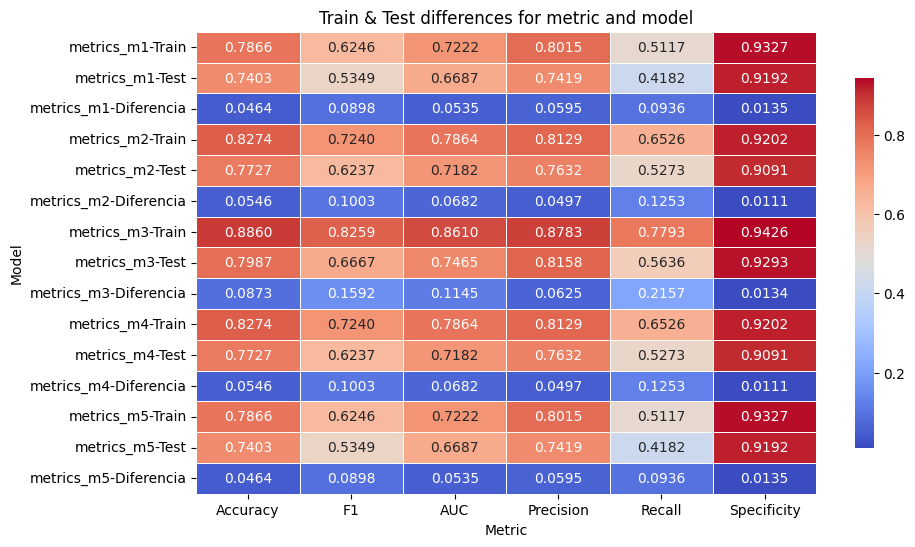

In [285]:
# Creo un heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(metrics_compared, annot=True, cmap='coolwarm', fmt=".4f", linewidths=.5, cbar_kws={"shrink": .8})

plt.title('Train & Test differences for metric and model')
plt.ylabel('Model')
plt.xlabel('Metric')
plt.show()

### We can assume that the boosting algorithm is substancially better than previous decision trees algorithms, in every
### metric except 'Recall', wich presents unacceptable results. 
###
### The better setting of hyperparamethers is:
### model3 = XGBClassifier(max_depth=30, min_child_weight=20, learning_rate=0.025)

